In [1]:
##https://plot.ly/dash/dash-core-components
## 畫圖 格式設定 參考  https://matplotlib.org/users/customizing.html

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  ##要用 .annotate的話，  matplotlib.__version__==2.0.2 較沒有問題
from collections import Counter
from bokeh.charts import TimeSeries, output_file, show
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


In [2]:
gr = pd.read_csv('gold_reserve_new.csv')
gr['Year'] = pd.to_datetime(gr.Year, errors = 'raise')    ## date 轉 datetime
gr = gr.set_index(gr['Year'], drop = True)
gr = gr.rename(columns={'United States':'US'})
gr.info()
gr.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2000-03-31 to 2017-03-31
Data columns (total 16 columns):
Year           18 non-null datetime64[ns]
US             18 non-null float64
Germany        18 non-null float64
IMF            18 non-null float64
Italy          18 non-null int64
France         18 non-null float64
China          18 non-null float64
Russia         18 non-null float64
Switzerlan     18 non-null float64
Japan          18 non-null float64
Netherlands    18 non-null float64
India          18 non-null int64
BIS            18 non-null float64
ECB            18 non-null float64
Turkey         18 non-null float64
Taiwan         18 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(2)
memory usage: 2.4 KB


,Year,US,Germany,IMF,Italy,France,China,Russia,Switzerlan,Japan,Netherlands,India,BIS,ECB,Turkey,Taiwan
Year,,,,,,,,,,,,,,,,
2000-03-31,2000-03-31,8137.50,3469.00,3217.0,2452,3025.00,395.00,379.00,2504.00,759.00,912.00,358,199.00,747.0,116.0,421.50
2001-03-31,2001-03-31,8142.50,3463.00,3217.0,2452,3025.00,421.50,403.50,2289.00,764.75,898.00,358,197.00,767.0,116.0,422.00
2002-03-31,2002-03-31,8149.00,3446.50,3217.0,2452,3025.00,525.25,397.25,2023.25,765.00,872.25,358,197.00,767.0,116.0,421.50
2003-03-31,2003-03-31,8135.00,3442.25,3217.0,2452,3025.00,600.00,388.25,1740.50,765.00,825.00,358,193.25,767.0,116.0,422.25
2004-03-31,2004-03-31,8135.75,3435.50,3217.0,2452,3014.75,600.00,389.00,1456.50,765.00,777.00,358,207.00,767.0,116.0,422.50


In [3]:
gr_d = np.transpose(gr)
gr_d = gr_d[1:]
gr_d.head()

Year,2000-03-31 00:00:00,2001-03-31 00:00:00,2002-03-31 00:00:00,2003-03-31 00:00:00,2004-03-31 00:00:00,2005-03-31 00:00:00,2006-03-31 00:00:00,2007-03-31 00:00:00,2008-03-31 00:00:00,2009-03-31 00:00:00,2010-03-31 00:00:00,2011-03-31 00:00:00,2012-03-31 00:00:00,2013-03-31 00:00:00,2014-03-31 00:00:00,2015-03-31 00:00:00,2016-03-31 00:00:00,2017-03-31 00:00:00
US,8137.5,8142.5,8149,8135,8135.75,8133.75,8133.5,8133,8133,8133,8133,8133,8133,8133,8133,8133,8133,8133
Germany,3469,3463,3446.5,3442.25,3435.5,3429.25,3424.5,3419.5,3414,3409,3404.25,3399.75,3394.75,3390,3384.5,3381.5,3378.75,3376
IMF,3217,3217,3217,3217,3217,3217,3217,3217,3217,3164,2898.75,2814,2814,2814,2814,2814,2814,2814
Italy,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452
France,3025,3025,3025,3025,3014.75,2893,2764,2650.5,2534.25,2442.25,2435,2435,2435,2435,2435,2435.5,2436,2436


# 歷年前15大黃金儲備量 - 依年份作圖

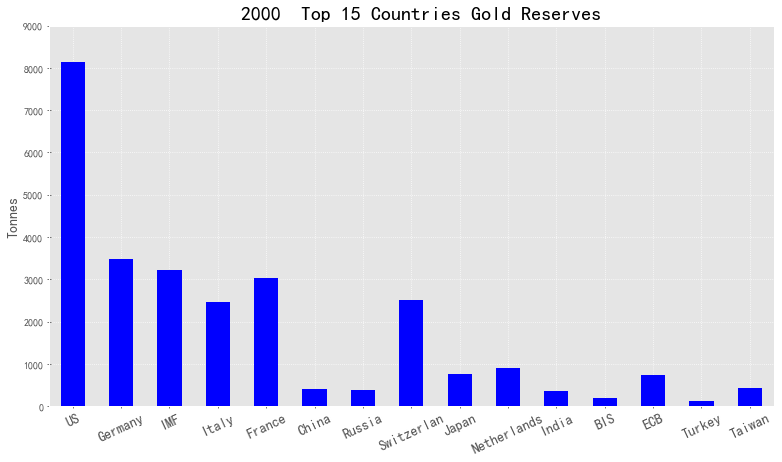

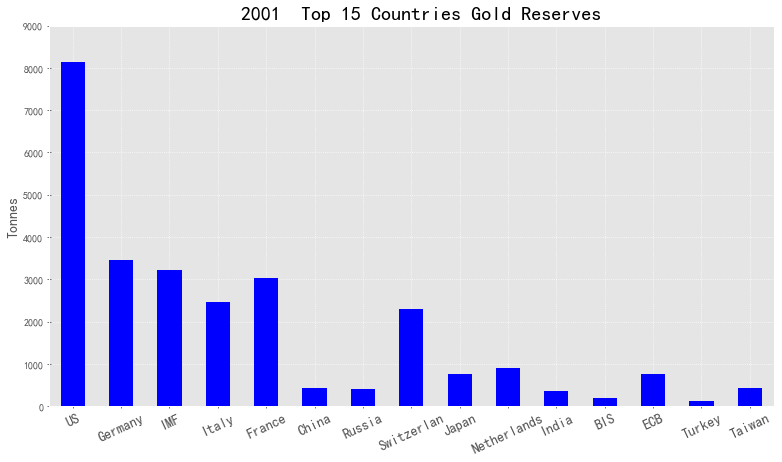

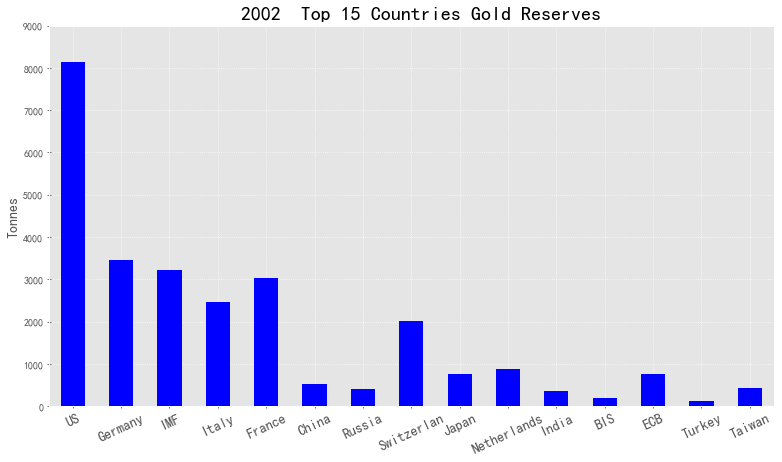

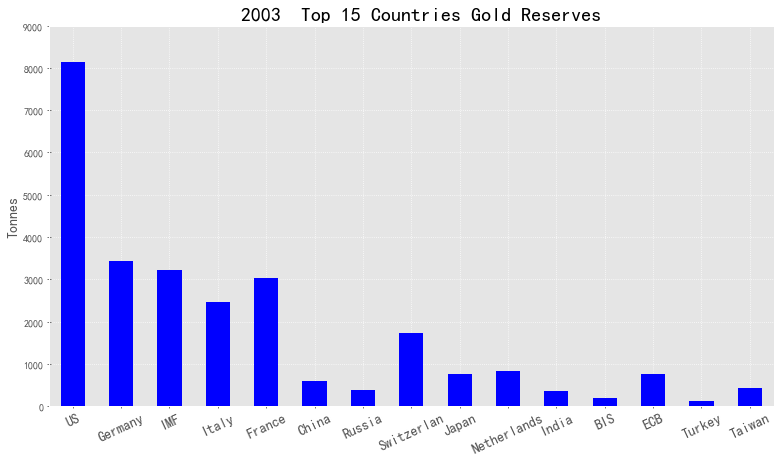

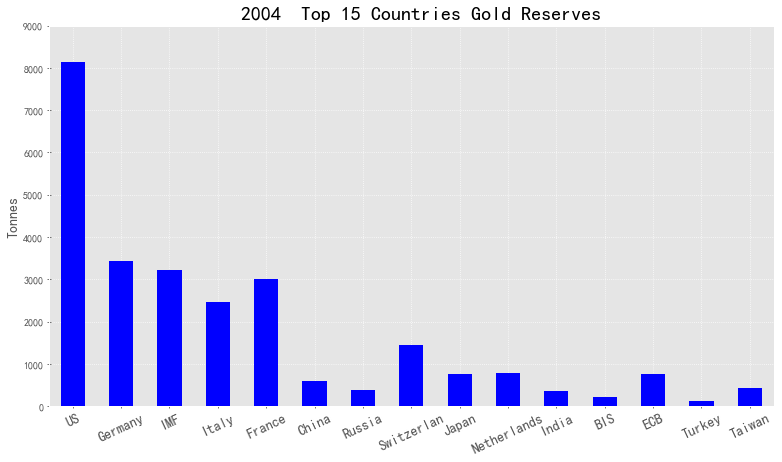

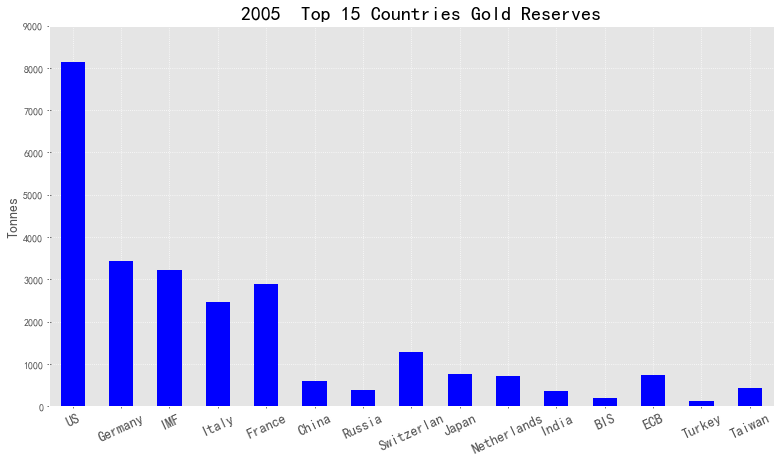

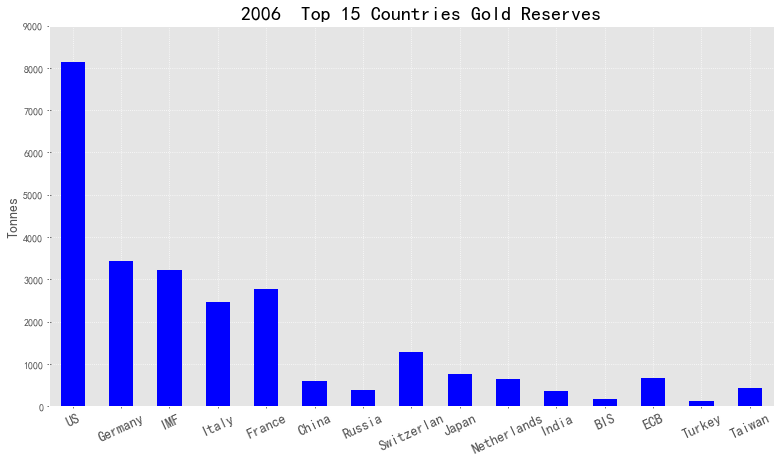

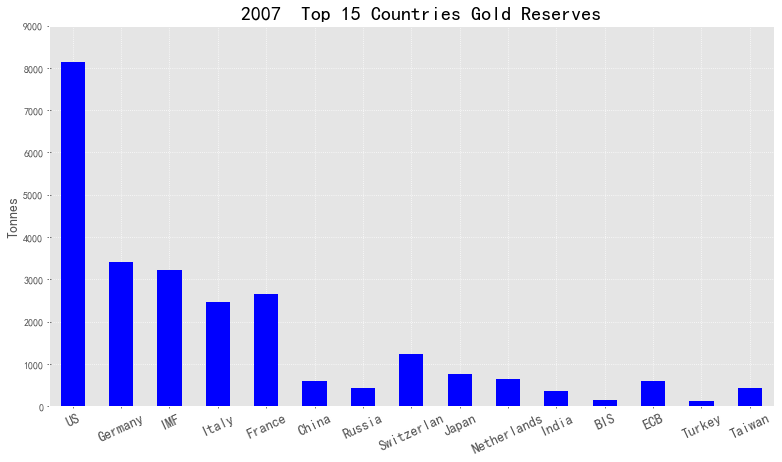

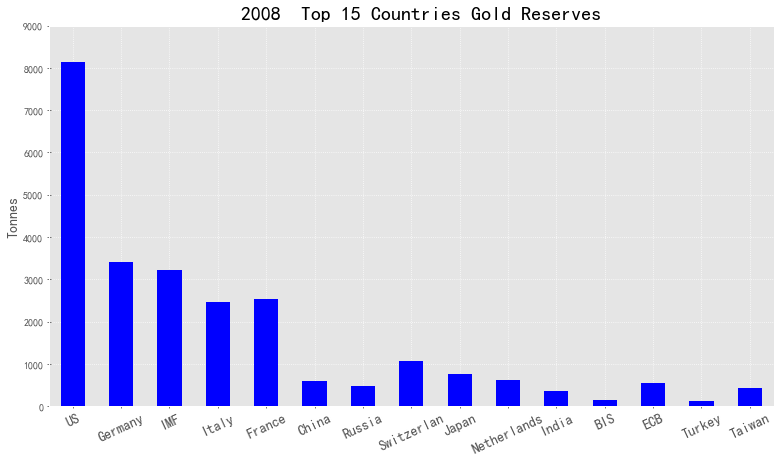

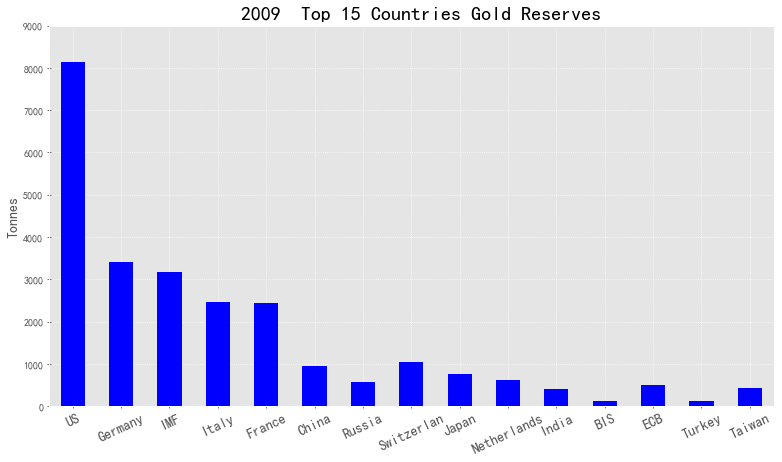

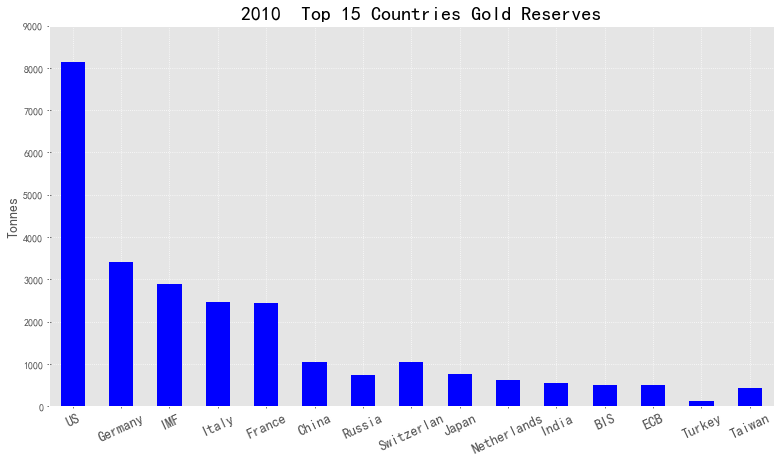

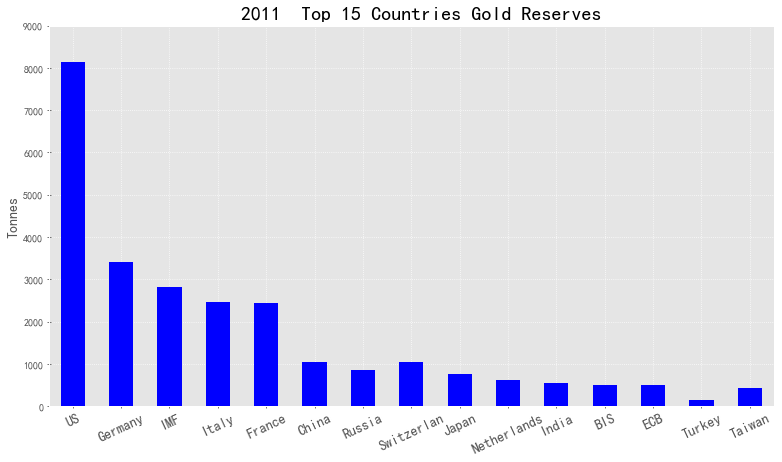

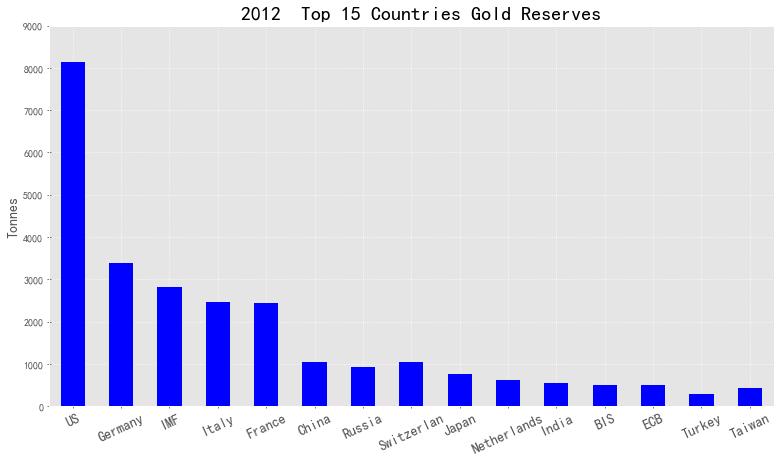

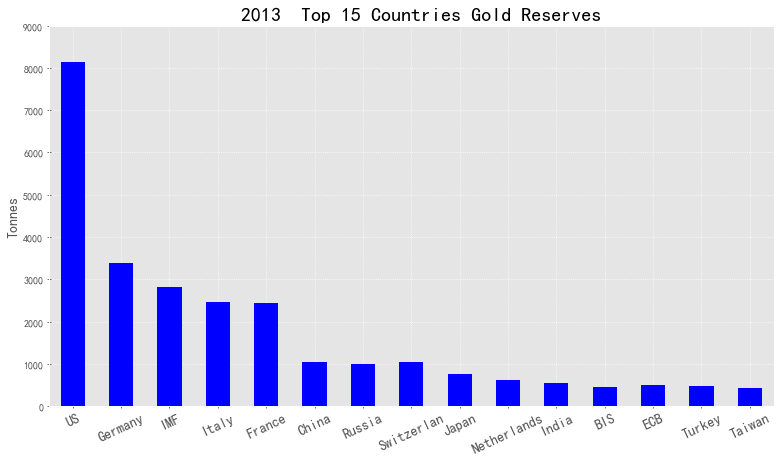

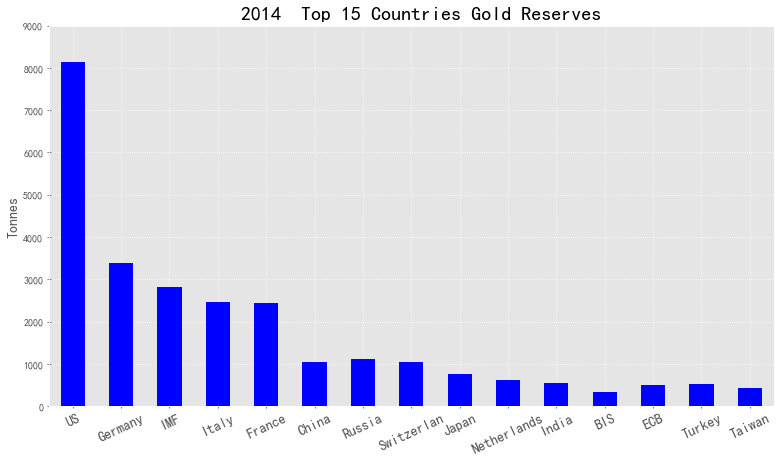

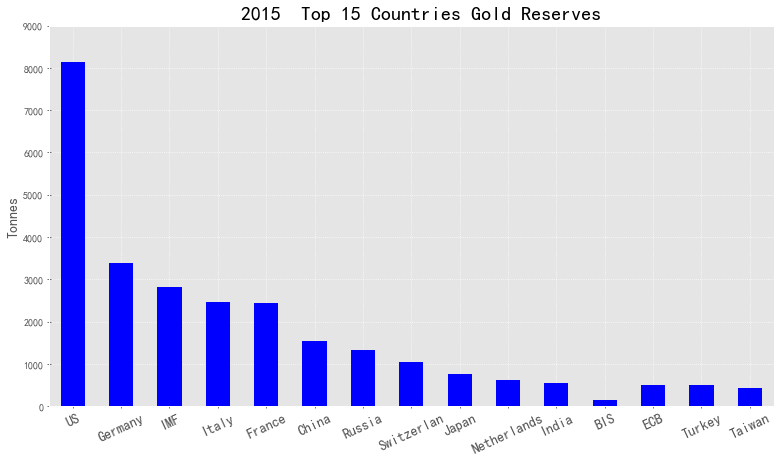

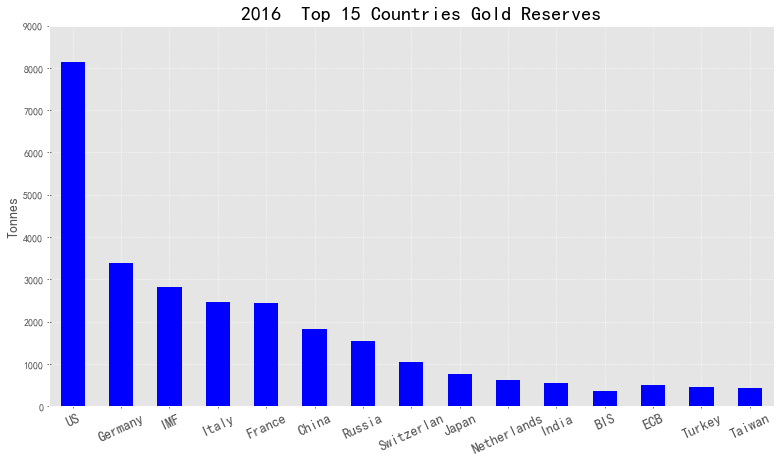

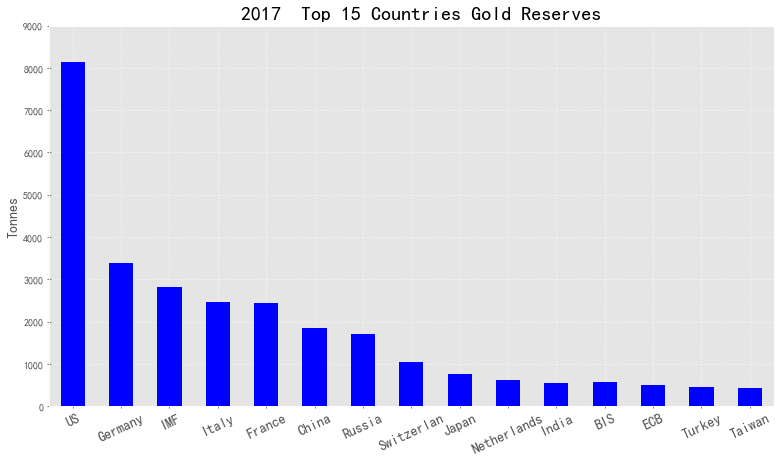

In [4]:
plt.rcdefaults()  ##重置 plt.rcParams
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'   # 顯示中文 且為黑體
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['axes.labelsize'] = 14  ##設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 20    # 設定標題大小
plt.rcParams['savefig.dpi'] = 300 #圖片像素
plt.rcParams['xtick.direction'] = 'inout'  # x軸刻度 位置
plt.rcParams['ytick.direction'] = 'inout'  # y軸刻度 位置
plt.rcParams['xtick.major.size'] = 3.5 # x軸刻度 長度
plt.rcParams['ytick.major.size'] = 3.5  # Y軸刻度 長度
plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = ':'   #網格樣式

colors = 'blue'

gr_d[gr_d.columns[0:1]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2000  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2000.png')

gr_d[gr_d.columns[1:2]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2001  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2001.png')

gr_d[gr_d.columns[2:3]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2002  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2002.png')

gr_d[gr_d.columns[3:4]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2003  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2003.png')

gr_d[gr_d.columns[4:5]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2004  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2004.png')

gr_d[gr_d.columns[5:6]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2005  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2005.png')

gr_d[gr_d.columns[6:7]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2006  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2006.png')

gr_d[gr_d.columns[7:8]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2007  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2007.png')

gr_d[gr_d.columns[8:9]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2008  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2008.png')

gr_d[gr_d.columns[9:10]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2009  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2009.png')

gr_d[gr_d.columns[10:11]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2010  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2010.png')

gr_d[gr_d.columns[11:12]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2011  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2011.png')

gr_d[gr_d.columns[12:13]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2012  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2012.png')

gr_d[gr_d.columns[13:14]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2013  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2013.png')

gr_d[gr_d.columns[14:15]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2014  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2014.png')

gr_d[gr_d.columns[15:16]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2015  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2015.png')

gr_d[gr_d.columns[16:17]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2016  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2016.png')

gr_d[gr_d.columns[17:18]].plot(kind = 'bar', color = colors, legend=False)
plt.title('  2017  Top 15 Countries Gold Reserves') ; plt.ylabel('Tonnes')
plt.ylim(0,9000) 
plt.xticks(rotation=25)
plt.savefig('GoldReserves_2017.png')

# 歷年前15大黃金儲備量 - 依國家別作圖

In [5]:
## 給 單一國別 vs 歷年黃金存量用
i = 2000
list_year = []
for i in range(2000, 2018):
    if 1999 < i < 2018:
        list_year.append(i)
        i+=1
    #print(i)
print(list_year)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


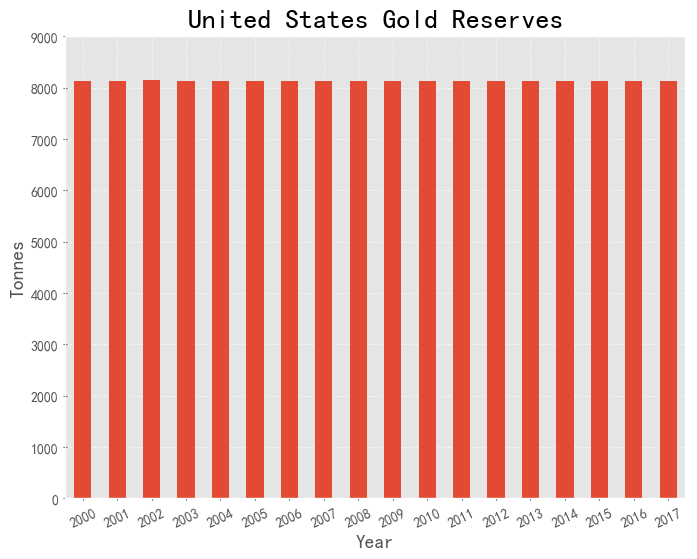

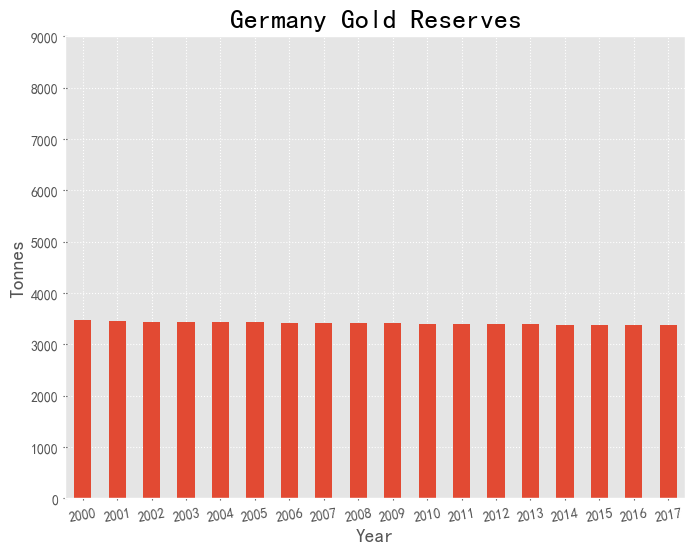

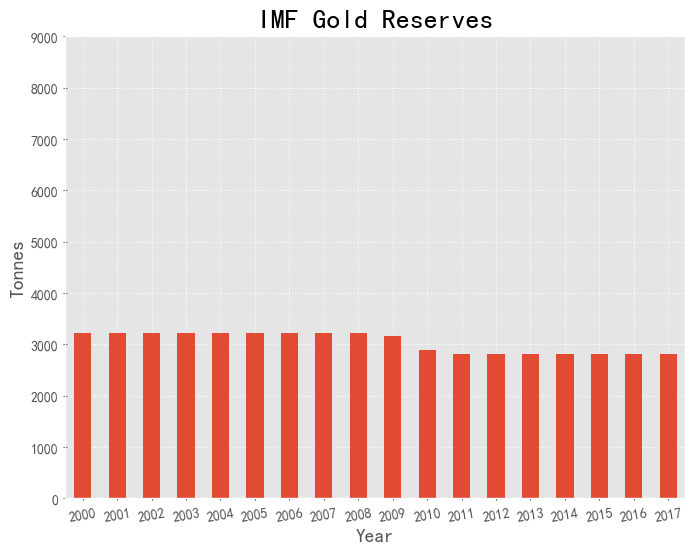

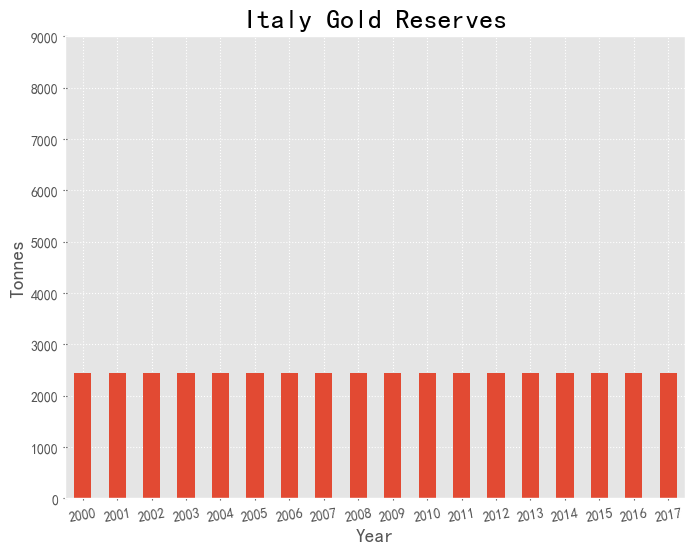

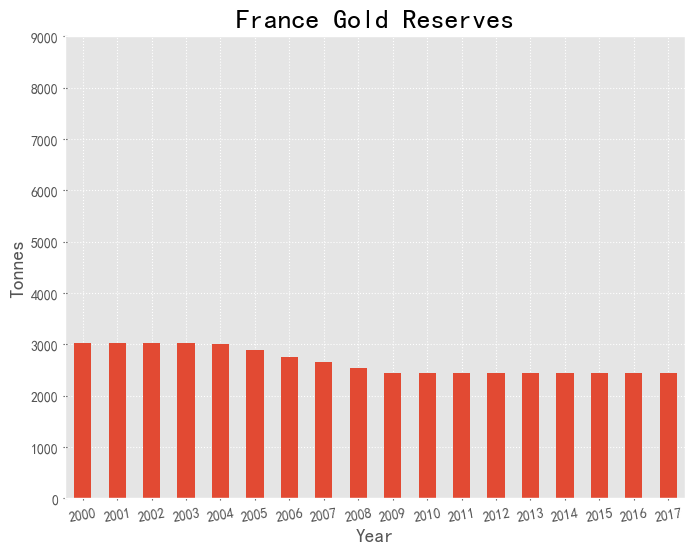

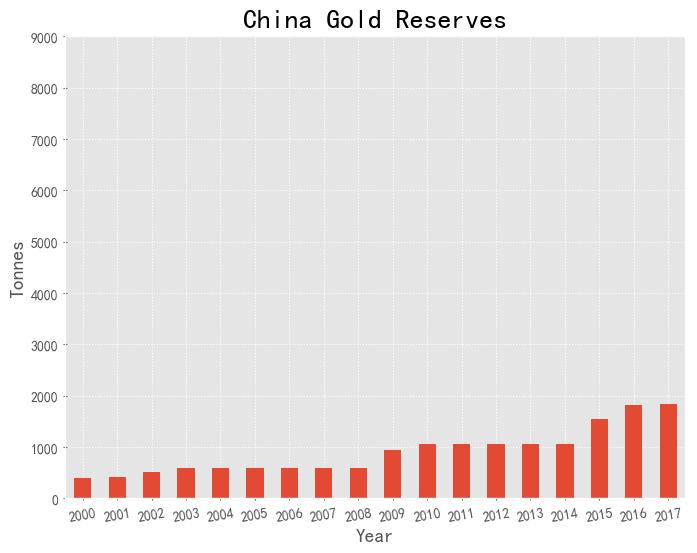

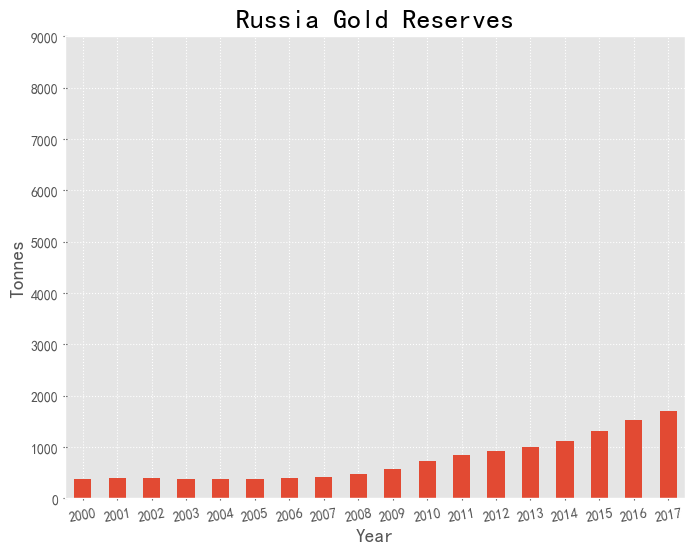

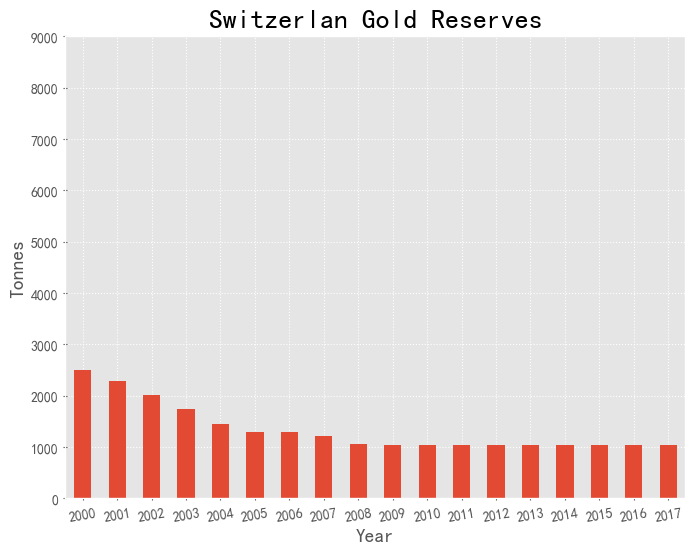

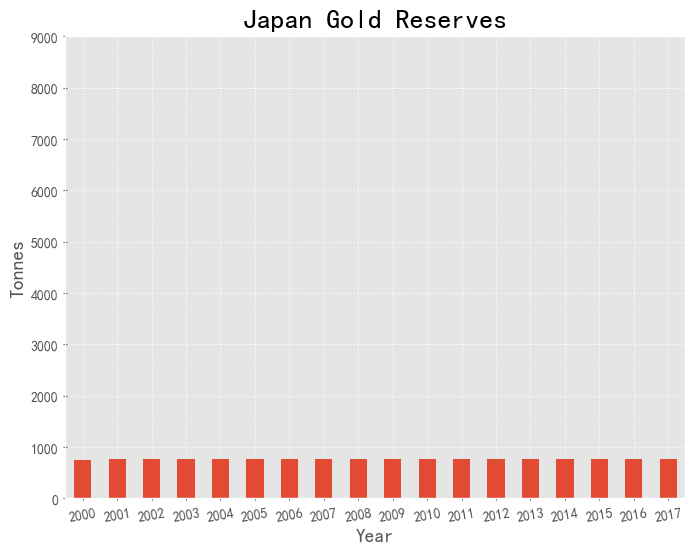

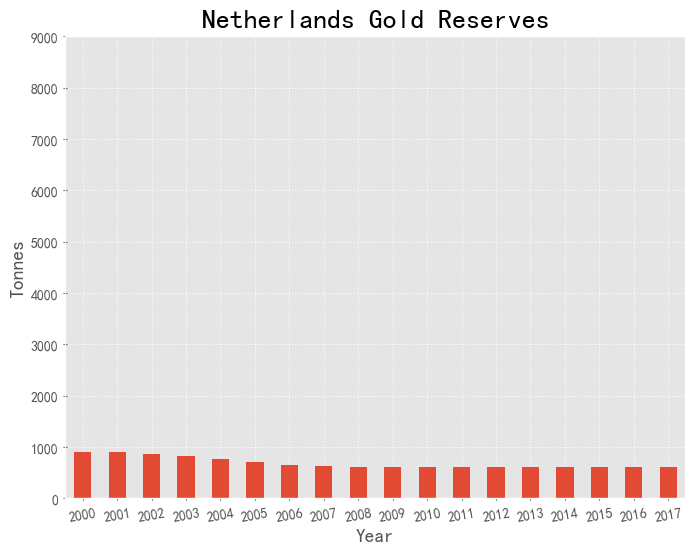

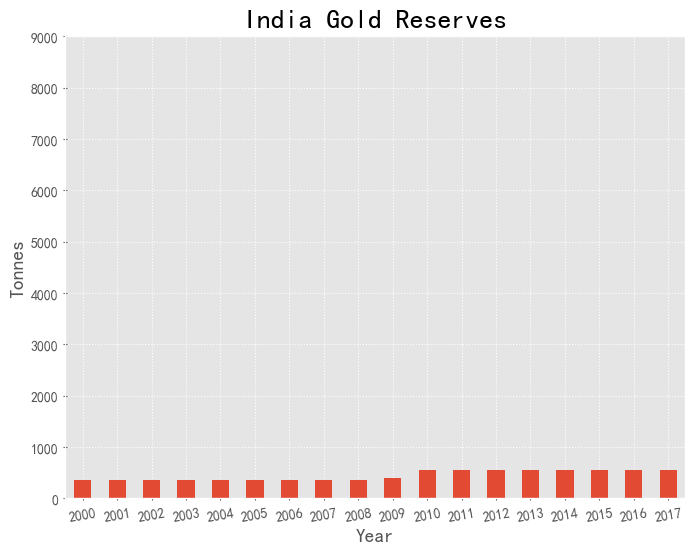

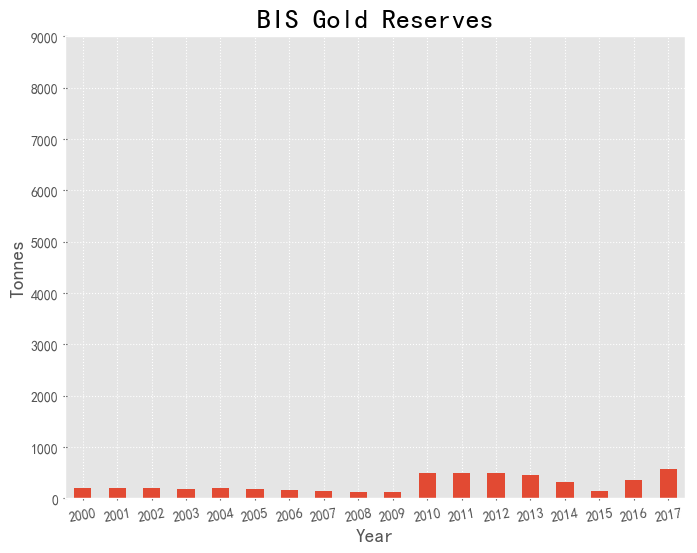

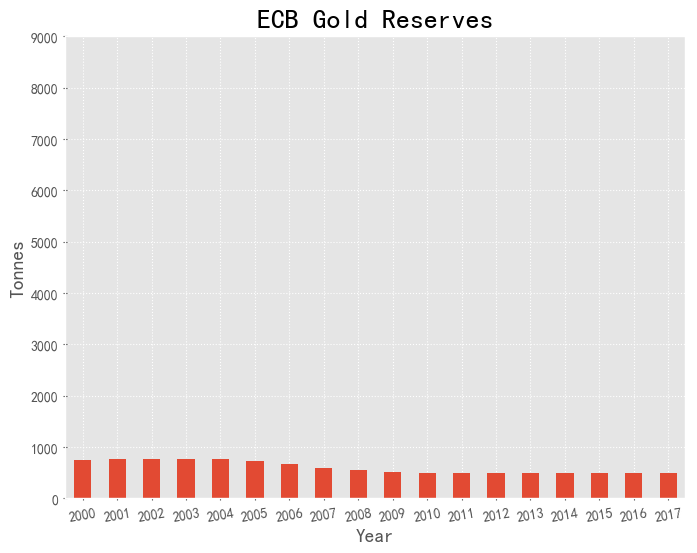

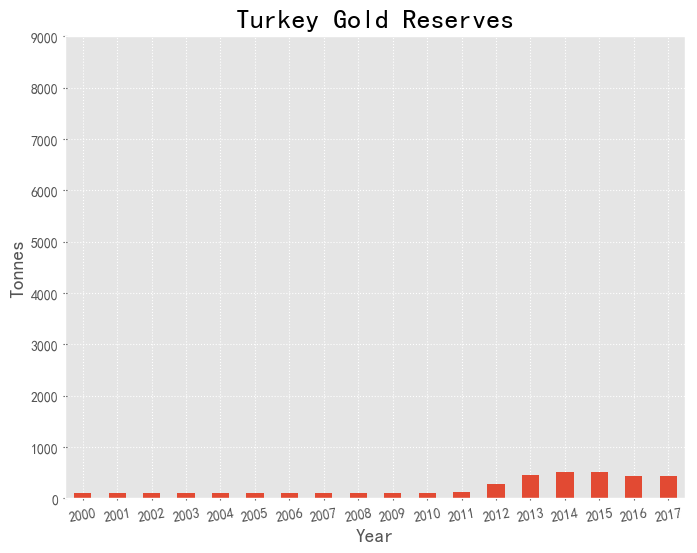

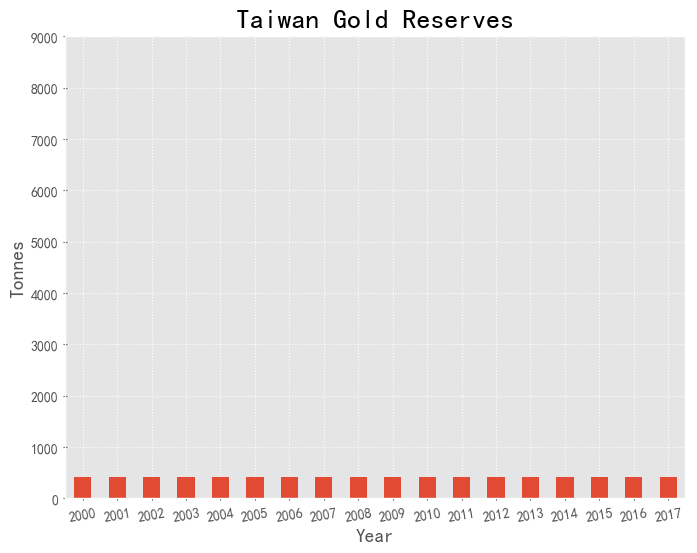

In [6]:
plt.rcdefaults()  ##重置 plt.rcParams
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'   # 顯示中文 且為黑體
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.labelsize'] = 14  ##設定x y軸 label 字體大小
plt.rcParams['axes.titlesize'] = 20    # 設定標題大小
plt.rcParams['savefig.dpi'] = 300 #圖片像素
plt.rcParams['xtick.direction'] = 'inout'  # x軸刻度 位置
plt.rcParams['ytick.direction'] = 'inout'  # y軸刻度 位置
plt.rcParams['xtick.major.size'] = 3.5 # x軸刻度 長度
plt.rcParams['ytick.major.size'] = 3.5  # Y軸刻度 長度
plt.rcParams['savefig.transparent'] = True  # 存檔背景透明
plt.rcParams['savefig.bbox'] = 'tight'  # 把所有的標籤都存進圖片(不會被切掉)
plt.rcParams['grid.linestyle'] = ':'   #網格樣式

gr[['US']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=25)
plt.title('United States Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_United States.png')

gr[['Germany']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Germany Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Germany.png')

gr[['IMF']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('IMF Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_IMF.png')

gr[['Italy']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Italy Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Italy.png')

gr[['France']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('France Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_France.png')

gr[['China']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('China Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_China.png')

gr[['Russia']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Russia Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Russia.png')

gr[['Switzerlan']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Switzerlan Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Switzerlan.png')

gr[['Japan']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Japan Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Japan.png')

gr[['Netherlands']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Netherlands Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Netherlands.png')

gr[['India']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('India Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_India.png')

gr[['BIS']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('BIS Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_BIS.png')

gr[['ECB']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('ECB Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_ECB.png')

gr[['Turkey']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Turkey Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Turkey.png')

gr[['Taiwan']].plot(kind = 'bar', legend=False).set_xticklabels(list_year)
plt.ylim(0,9000)
plt.xticks(rotation=10)
plt.title('Taiwan Gold Reserves') ; plt.ylabel('Tonnes')
plt.savefig('GoldReserves_Taiwan.png')